In [103]:
from collections import defaultdict

import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [104]:
def read_json(path):
    with open(path) as f:
        return json.load(f)


def plot_results(
    results_df: pd.DataFrame, 
    legend_title: str, 
    legend_loc: str, 
    save_path: str, 
    bbox_to_anchor: tuple = None
) -> None:
    """Plots the results of the experiments."""
    plt.figure(figsize=(10, 6))
    sns.set_style('whitegrid')
    ax = sns.barplot(
        x='metric_name',
        y='metric',
        hue='name',
        data=results_df,
        palette='Set2'
    )

    for p in ax.patches:
        ax.annotate(
            format(p.get_height(), '.3f'),
            (p.get_x() + p.get_width() / 2., p.get_height() - 0.005),
            ha='center',
            va='center', 
            xytext=(0, 9),
            textcoords='offset points',
            fontweight='bold',
            fontsize=10
        )

    sns.despine(left=False)
    ax.spines['bottom'].set_color('black')
    ax.spines['left'].set_color('black')
    plt.legend(title=legend_title, loc=legend_loc, bbox_to_anchor=bbox_to_anchor)
    plt.xlabel('')
    plt.ylabel('Valor')
    plt.savefig(save_path, bbox_inches='tight')
    plt.show()


def create_results_df(file_paths: list[str], names: list[str]) -> pd.DataFrame:
    results_dict = defaultdict(list)
    for name, file_path in zip(names, file_paths):
        results = read_json(file_path)
        for metric in ('precision', 'recall', 'f1'):
            results_dict['name'].append(name.capitalize())
            results_dict['metric'].append(results['results'][metric])
            results_dict['metric_name'].append(metric.capitalize())
    
    return pd.DataFrame(results_dict)

# Baseline

In [ ]:
baseline_files = [
    '../results/00_baseline/tv.json', '../results/00_baseline/reli.json'
]
baseline_names = ['tv', 'reli']
baseline_df = create_results_df(baseline_files, baseline_names)

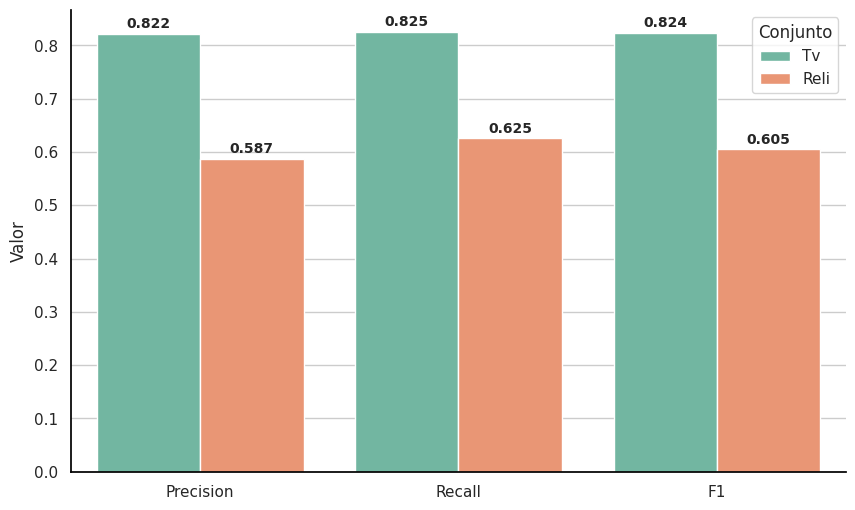

In [108]:
plot_results(baseline_df, 'Conjunto', 'best', '../images/baseline.png')

# BERTvisio and LiteraBERT

In [ ]:
bert_files = [
    '../results/03_fine_tuning/tv/bert_tv.json', 
    '../results/03_fine_tuning/reli/bert_reli.json'
]
bert_names = ['BERTtv', 'BERTreli']
bert_df = create_results_df(bert_files, bert_names)

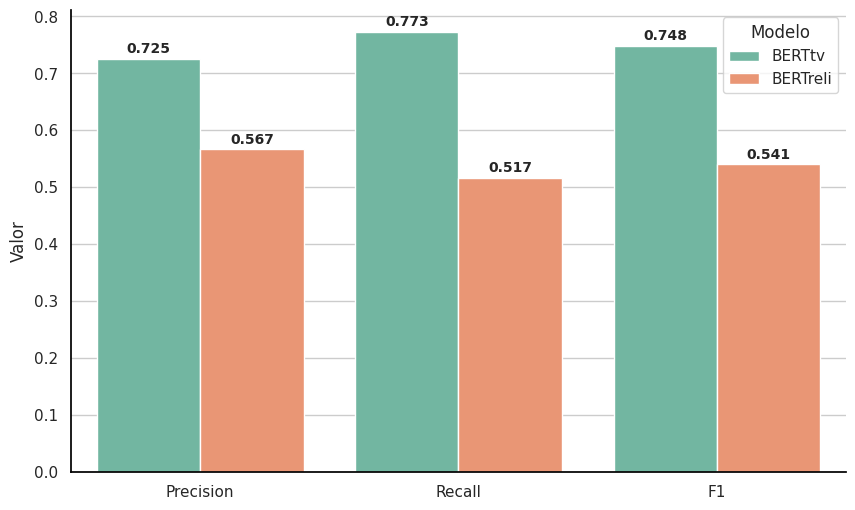

In [112]:
plot_results(bert_df, 'Modelo', 'upper right', '../images/bert_specific_domain.png')

# Double Embedding

In [ ]:
d_bert_files = [
    '../results/03_fine_tuning/tv/d_bert_tv.json', 
    '../results/03_fine_tuning/reli/d_bert_reli.json'
]
d_bert_names = ['d-BERTtv', 'd-BERTreli']
d_bert_df = create_results_df(d_bert_files, d_bert_names)

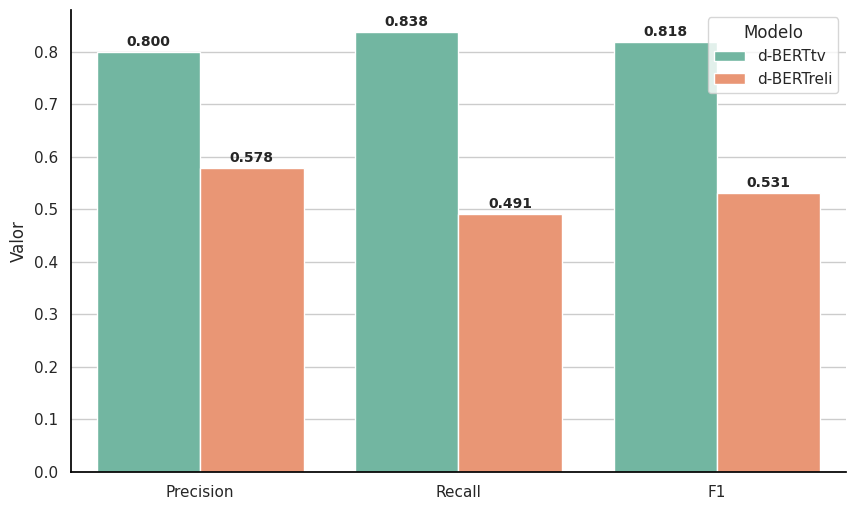

In [116]:
plot_results(d_bert_df, 'Modelo', 'best', '../images/duplo_embedding_1.png')

In [ ]:
d_bert2_files = [
    '../results/03_fine_tuning/tv/d_bert_tv.json', 
    '../results/03_fine_tuning/reli/d_bert_reli.json'
]
d_bert_names = ['d-BERTtv', 'd-BERTreli']
d_bert2_df = create_results_df(d_bert2_files, d_bert_names)

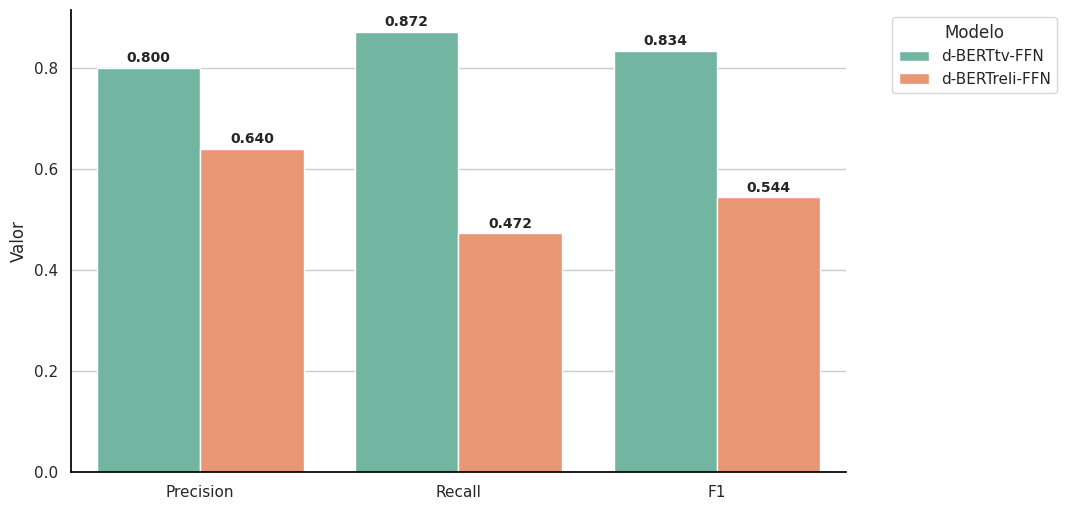

In [120]:
plot_results(
    d_bert2_df, 
    'Modelo', 
    'best', 
    '../images/duplo_embedding_2.png', 
    bbox_to_anchor=(1.05, 1)
)

# GPT

In [121]:
tv = read_json('../results/03_fine_tuning/tv/gpt.json')

In [122]:
results_dict = defaultdict(list)
for name, results in tv.items():
    if name == 'hyperparams':
        continue
    for metric in ('precision', 'recall', 'f1'):
        results_dict['name'].append(name)
        results_dict['metric'].append(results[metric])
        results_dict['metric_name'].append(metric.capitalize())

In [123]:
results_df = pd.DataFrame(results_dict)
results_df

,name,metric,metric_name
0,ada,0.7627,Precision
1,ada,0.8000,Recall
2,ada,0.7809,F1
3,babbage,0.7787,Precision
4,babbage,0.8133,Recall
5,babbage,0.7957,F1
6,curie,0.7530,Precision
7,curie,0.8400,Recall
8,curie,0.7941,F1


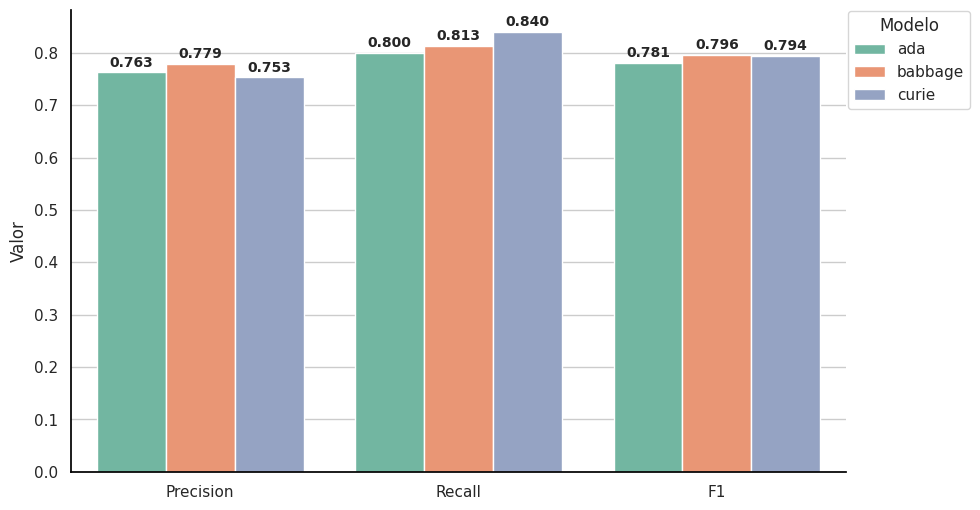

In [124]:
plot_results(results_df, 'Modelo', 'upper right', '../images/gpt.png', bbox_to_anchor=(1.17, 1.015))

# BERTimbau com LoRa

In [ ]:
lora_files = [
    '../results/03_fine_tuning/tv/lora_baseline.json', 
    '../results/03_fine_tuning/reli/lora_baseline.json'
]
lora_names = ['TV', 'ReLi']
lora_df = create_results_df(lora_files, lora_names)

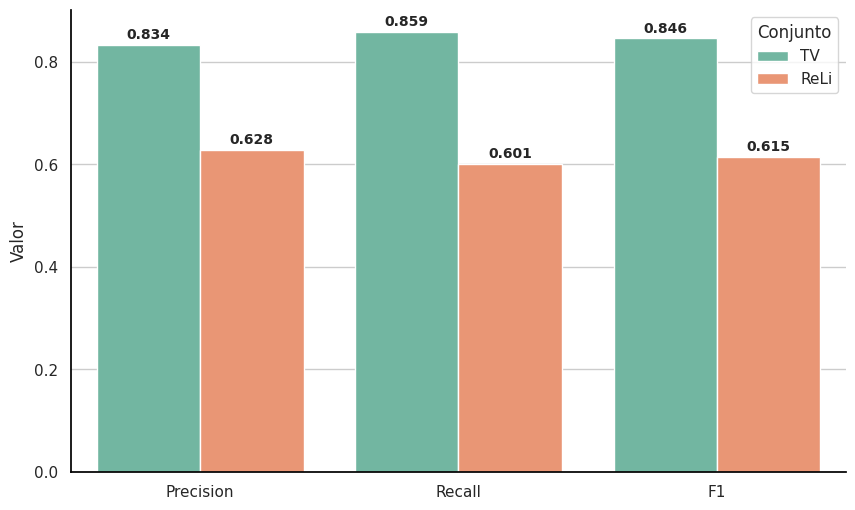

In [128]:
plot_results(lora_df, 'Conjunto', 'best', '../images/baseline_lora.png')

# openCabrita com QLoRa

In [ ]:
qlora_files = [
    '../results/03_fine_tuning/tv/qlora_open_cabrita.json', 
    '../results/03_fine_tuning/reli/qlora_open_cabrita.json'
]
qlora_names = ['TV', 'ReLi']
qlora_df = create_results_df(qlora_files, qlora_names)

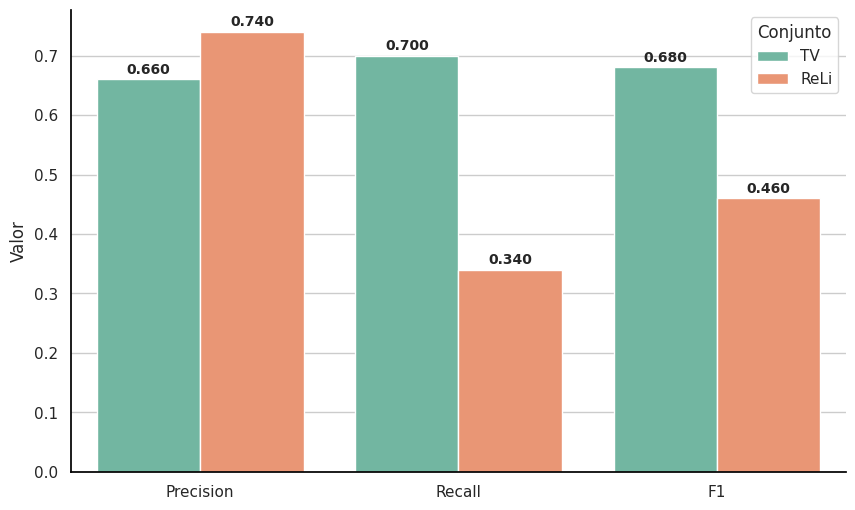

In [132]:
plot_results(qlora_df, 'Conjunto', 'best', '../images/open_cabrita_qlora.png')

# Trainable params

### FALTA COLOCAR OS PARÂMETROS DO BASELINE

In [133]:
import os
import json

from collections import defaultdict

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [134]:
# pegando todos os arquivos de resultados
root_dir = '../results/03_fine_tuning'

files = []
for dirpath, dirnames, filenames in os.walk(root_dir):
    for filename in filenames:
        file_path = os.path.join(dirpath, filename)
        if 'gpt' not in file_path:
            files.append(file_path)

# adicionando os resultados do baseline
files.append('../results/00_baseline/tv.json')
files.append('../results/00_baseline/reli.json')

In [135]:
# dicionário para mapeamento do nome dos modelos
model_mapper = {
    "lora_baseline": "BERTimbau-LoRa",
    "qlora_open_cabrita": "openCabrita-QLoRa",
    "d_bert_tv_ffn": "d-BERTtv-FFN",
    "bert_tv": "BERTtv",
    "d_bert_tv": "d-BERTtv",
    "d_bert_reli": "d-BERTreli",
    "bert_reli": "BERTreli",
    "d_bert_reli_ffn": "d-BERTreli-FFN",
    "tv": "Baseline-tv",
    "reli": "Baseline-reli"
}

In [136]:
trainable_params = defaultdict(lambda: defaultdict(dict))
for file in files:
    with open(file, 'r') as f:
        dados = json.load(f)
    splited_name = file.split('/')
    dataset = splited_name[-2]
    model = model_mapper[splited_name[-1].replace('.json', '')]
    trainable_params[dataset][model] = {
        "trainable_params": dados['trainable_params'],
        "f1": dados['results']['f1']    
    }

In [137]:
data = {'Dataset': [], 'Model': [], 'Trainable Params': [], 'F1': []}

for dataset, models in trainable_params.items():
    for model, params in models.items():
        if "Baseline" in model:
            dataset = model.split('-')[-1]
            model = model.split('-')[0]
        data['Dataset'].append(dataset)
        data['Model'].append(model)
        data['Trainable Params'].append(params['trainable_params'])
        data['F1'].append(params['f1'])
        
df = pd.DataFrame(data).sort_values('Trainable Params')

In [138]:
df[df.Dataset == 'tv']

,Dataset,Model,Trainable Params,F1
1,tv,BERTimbau-LoRa,915459,0.846316
3,tv,openCabrita-QLoRa,4326400,0.680000
0,tv,BERTtv,47511555,0.748414
10,tv,Baseline,108925443,0.823529
4,tv,d-BERTtv,156436995,0.818372
2,tv,d-BERTtv-FFN,158798595,0.834356


In [139]:
def plot_trainable_params_f1(data, filename):

    sns.set_theme(style="white")

    fig, ax1 = plt.subplots(figsize=(10, 8))

    barplot = sns.barplot(
        x='Model', 
        y='Trainable Params', 
        data=data, 
        ax=ax1, 
        color='cornflowerblue', 
        label='Trainable Params'
    )

    ax2 = ax1.twinx()

    lineplot = ax2.plot(
        data['Model'], 
        data['F1'], 
        color='r', 
        marker='o', 
        label='F1 Score'
    )

    ax1.set_yscale('log')

    ax1.set_xlabel('', fontsize=14)
    ax1.set_ylabel('Trainable Parameters (log)', fontsize=20, color='cornflowerblue')
    ax2.set_ylabel('F1 Score', fontsize=20, color='r')

    ax1.set_xticklabels(data['Model'], rotation=90, fontsize=15)

    ax1.tick_params(axis='y', colors='cornflowerblue', labelsize=18)
    ax2.tick_params(axis='y', colors='r', labelsize=18)

    plt.tight_layout()
    plt.savefig(filename)
    plt.show()

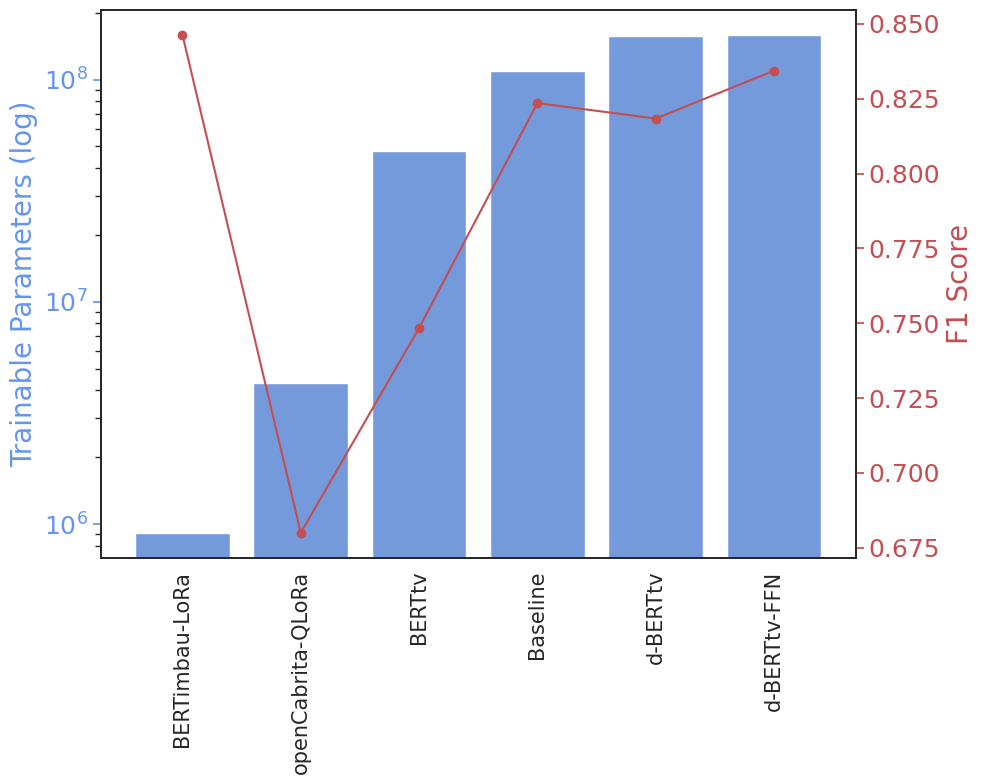

In [140]:
plot_trainable_params_f1(df[df.Dataset == 'tv'].iloc[:,1:], 'results_tv.png')


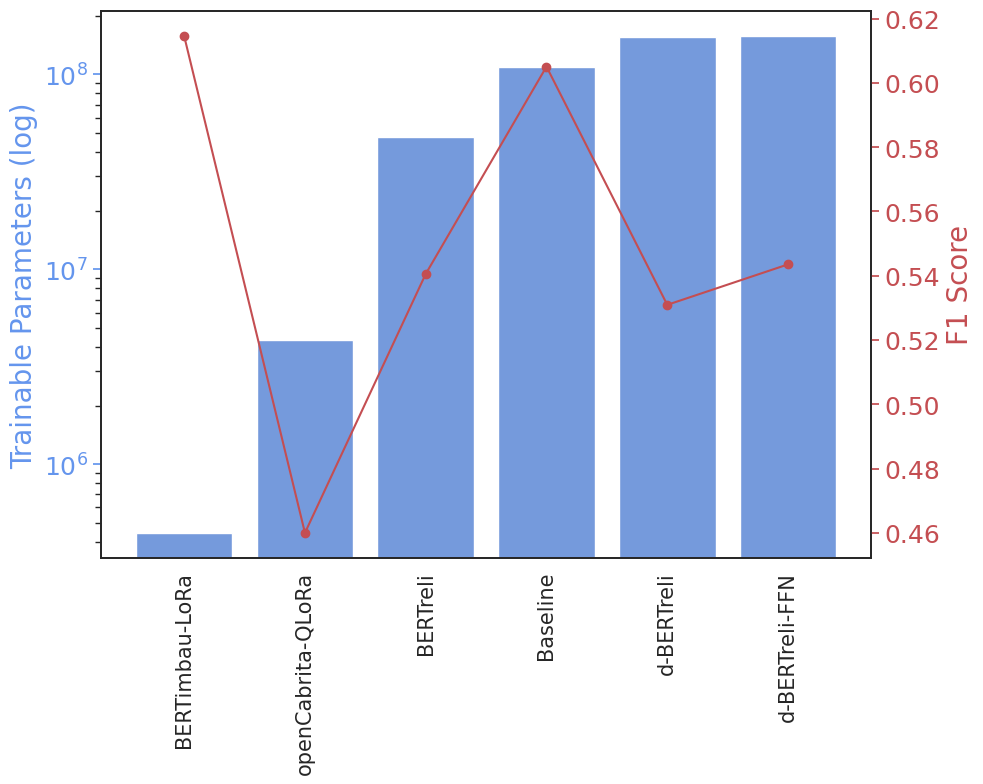

In [141]:
plot_trainable_params_f1(df[df.Dataset == 'reli'].iloc[:,1:], 'results_reli.png')